In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import random
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing, cross_validation, metrics
from sklearn.linear_model import Perceptron

In [3]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state = 0)
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn = Perceptron(n_iter=40, eta0=0.1, random_state = 0) 
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('muestras clasificadas erroneas: %d' % (np.ravel(y_test) != y_pred).sum())
print('exactitud: %.2f' % metrics.accuracy_score(np.ravel(y_test),y_pred))

muestras clasificadas erroneas: 4
exactitud: 0.87


Confusion matrix, without normalization
[[10  1  0]
 [ 0 13  0]
 [ 0  3  3]]


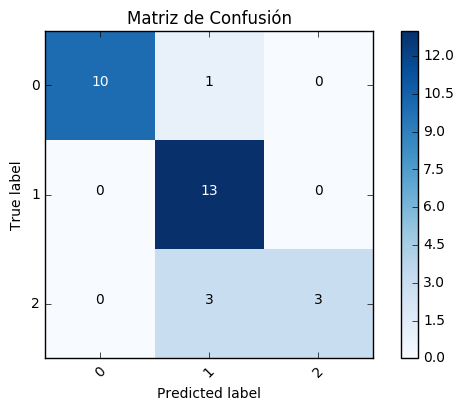

In [5]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred,np.unique(y_test))
np.set_printoptions(precision=0)
plot_confusion_matrix(cnf_matrix, np.unique(y_test), normalize = False, title = 'Matriz de Confusión' )

Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


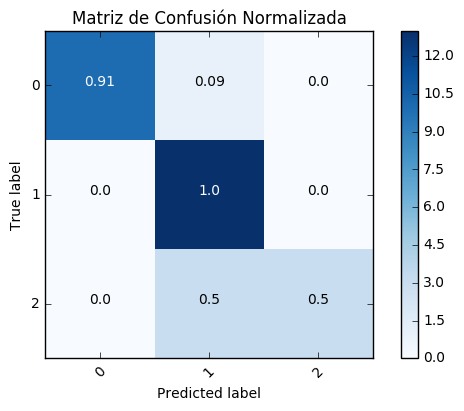

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred,np.unique(y_test))
np.set_printoptions(precision=0)
plot_confusion_matrix(cnf_matrix, np.unique(y_test), normalize = True, title = 'Matriz de Confusión Normalizada')